In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def tf(k,N):
    return np.exp((-1j*2*np.pi*k)/N)

tf(0,4)

(1+0j)

In [4]:
def fft(x):
    f = np.zeros_like(x,dtype=complex)
    for i in np.arange(len(f)):
        f[i]=fft_k(x,i) 
    return f

def fft_k(x,k):
    if(len(x)==1):
         return x[0]
    f= 0+0j
    x_even = x[::2]
    x_odd = x[1::2]
    
    fe= fft_k(x_even,k)
    fo = fft_k(x_odd,k)
    xfo= np.multiply(tf(k,len(x)) ,fo,dtype=complex)
    f=np.add(fe,xfo,dtype=complex)
    return f
    

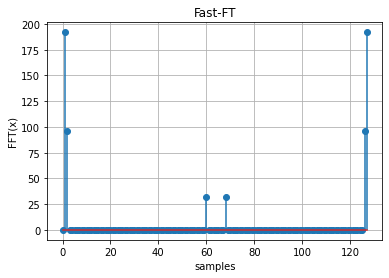

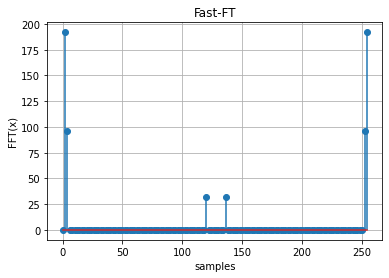

<Figure size 432x288 with 0 Axes>

In [5]:
slew_rate=128
ts = 1/slew_rate
t = np.arange(0,1,ts)
freq = 1
x = 3*np.sin(2*np.pi*freq*t)
freq = 2
x += np.sin(2*np.pi*freq*t)
freq = 2
x += 0.5*np.sin(2*np.pi*freq*t)
freq = 60
x += 0.5*np.sin(2*np.pi*freq*t)

res = fft(x)



T= len(x)/slew_rate
freq = np.arange(len(x))/T


plt.stem(freq,abs(res),use_line_collection = True)
plt.title("Fast-FT")
plt.ylabel("FFT(x)")
plt.xlabel("samples")
plt.grid(True)
plt.show()
plt.savefig("e4_fft.pdf")



T= (len(x)//2)/slew_rate
freq = np.arange(len(x))/T


plt.stem(freq,abs(res),use_line_collection = True)
plt.title("Fast-FT")
plt.ylabel("FFT(x)")
plt.xlabel("samples")
plt.grid(True)
plt.show()
plt.savefig("e4_fft.pdf")


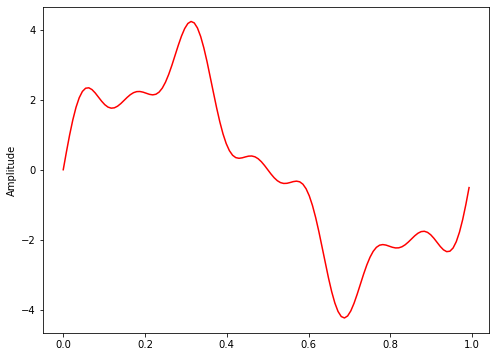

In [15]:
"""
A recursive implementation of the 1D Cooley-Tukey FFT, the 
input should have a length of power of 2. 
"""
def FFT(x):
	N = len(x)    
	if N == 1:
		return x
	else:
		X_even = FFT(x[::2])
		X_odd = FFT(x[1::2])
		factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
	X = np.concatenate(\
		[X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
	return X

# sampling rate
fs = 128
# sampling interval
ts = 1.0/fs
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.show()

# Compute FFT of x
X=FFT(x)


# calculate the frequency
N = len(X)
k = np.arange(N)
T = N/fs
freq = k/T  

# plt.figure(figsize = (12, 6))
# plt.subplot(121)
# plt.stem(freq, abs(X))
# plt.xlabel('Freq (Hz)')
# plt.ylabel('FFT Amplitude |X(freq)|')

# # Get the one-sided specturm
# n_oneside = N//2
# # get the one side frequency
# f_oneside = freq[:n_oneside]

# # normalize the amplitude
# X_oneside =X[:n_oneside]/n_oneside

# plt.subplot(122)
# plt.stem(f_oneside, abs(X_oneside))
# plt.xlabel('Freq (Hz)')
# plt.ylabel('Normalized FFT Amplitude |X(freq)|')
# plt.tight_layout()
# plt.show()
